# Python and R

In [60]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [62]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python:

In [117]:
df = pd.read_csv('raw-polls.csv')
df.sample(30)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
9108,56786,91506,8273,2018,2018_House-G_US,US,House-G,House-G,YouGov,391,Online,NaN,10/21/18,2321.0,Generic Candidate,10427,DEM,48.00,Generic Candidate,10428,REP,40.00,NaN,8.0,11/6/18,53.58,43.72,9.86,-1.86,1.0,for George Washington University; among regist...
6380,51342,81208,5174,2012,2012_House-G_NY-21,NY-21,House-G,House-G,Public Opinion Strategies,260,Live Phone,R,10/25/12,400.0,William L. Owens,10642,DEM,42.00,Matthew A. Doheny,7043,REP,40.00,NaN,2.0,11/6/12,50.16,48.19,1.97,0.03,1.0,for Matthew A. Doheny
115,26240,87912,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,CBS News/The New York Times,36,Live Phone,NaN,10/23/98,639.0,Peter Vallone,13080,DEM,21.00,George Pataki,13083,REP,56.00,NaN,-35.0,11/3/98,33.16,54.32,-21.15,-13.85,1.0,among registered voters
3532,2682,3298,7374,2008,2008_Pres-D_NJ,NJ,Pres-P,Pres-D,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,1/31/08,400.0,Hillary Rodham Clinton,45,DEM,46.00,Barack Obama,41,DEM,39.00,NaN,7.0,2/5/08,53.76,43.93,9.83,NaN,1.0,NaN
10584,72590,136228,6256,2020,2020_Pres-G_VA,VA,Pres-G,Pres-G,Data for Progress,522,Online/Text,NaN,10/30/20,690.0,Joseph R. Biden Jr.,13256,DEM,54.00,Donald Trump,13254,REP,43.00,1.0,11.0,11/3/20,54.11,44.00,10.11,0.89,1.0,NaN
6921,63728,117317,1471,2013,2013_Sen-GS_NJ,NJ,Sen-G,Sen-GS,Quinnipiac University,267,Live Phone,NaN,10/12/13,1696.0,Cory A. Booker,13706,DEM,54.00,Steven M. Lonegan,13707,REP,40.00,NaN,14.0,10/16/13,54.92,44.02,10.90,3.10,1.0,NaN
6445,63880,36557,698,2012,2012_Pres-G_VA,VA,Pres-G,Pres-G,Zogby Interactive/JZ Analytics,395,Online,NaN,10/27/12,827.0,Barack Obama,16,DEM,48.25,Mitt Romney,9,REP,46.55,0.9,1.7,11/6/12,51.16,47.28,3.87,-2.17,1.0,average of multiple versions or turnout models...
9608,64508,118829,7755,2020,2020_Pres-D_TX,TX,Pres-P,Pres-D,YouGov,391,Online,NaN,2/12/20,1352.0,Joseph R. Biden Jr.,13256,DEM,20.40,Bernard Sanders,13257,DEM,20.10,12.2,0.3,3/3/20,34.64,29.91,4.74,NaN,1.0,for University of Houston
7024,33804,125158,23,2014,2014_Sen-G_CO,CO,Sen-G,Sen-G,Quinnipiac University,267,Live Phone,NaN,10/18/14,974.0,Mark Udall,6153,DEM,42.50,Cory Gardner,6149,REP,47.00,NaN,-4.5,11/4/14,46.26,48.20,-1.94,-2.56,1.0,average of multiple versions or turnout models...
7865,36614,50252,7618,2016,2016_Pres-D_OH,OH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,3/13/16,400.0,Hillary Rodham Clinton,9207,DEM,52.00,Bernard Sanders,9739,DEM,45.00,NaN,7.0,3/15/16,56.12,43.13,12.99,NaN,1.0,for American Research Group


In [118]:
pres_df = df.query("type_simple=='Pres-G' & location=='US'")

pres_df.pivot_table(
    index='year', 
    values='bias', 
    aggfunc=['mean','median','std', 'count'])

,mean,median,std,count
,bias,bias,bias,bias
year,,,,
2000,-2.962000,-3.01,3.444909,75
2004,0.916923,1.46,2.514332,65
2008,0.011319,-0.27,2.810690,91
2012,-3.432706,-2.85,2.305543,85
2016,1.552308,1.65,3.361668,78
2020,3.829681,4.05,2.944325,94


The cell below loads the same data in R:

In [64]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 x 31
   poll_id questio~1 race_id  year race  locat~2 type_~3 type_~4 polls~5 polls~6
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998~ NY      Gov-G   Gov-G   Blum &~      32
 2   26255     87926    1456  1998 1998~ OH      Gov-G   Gov-G   Univer~     346
 3   26026     31266    1736  1998 1998~ NV      Sen-G   Sen-G   FM3 Re~      91
 4   26013     31253    1738  1998 1998~ NY      Sen-G   Sen-G   Blum &~      32
 5   63632    117103    1738  1998 1998~ NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

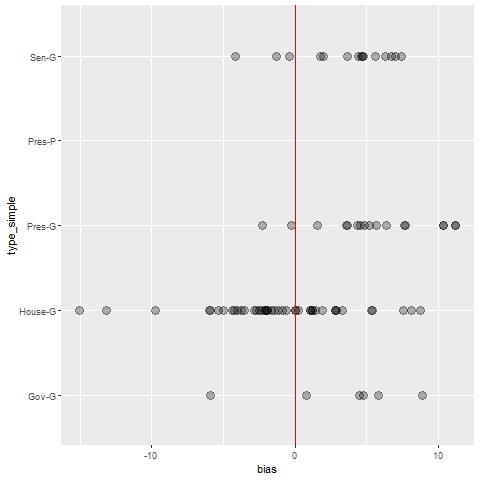

In [65]:
%%R

pollster_df <- df %>% filter(pollster=='Siena College/The New York Times Upshot')

ggplot(pollster_df) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    geom_vline(aes(xintercept=0), color='red')

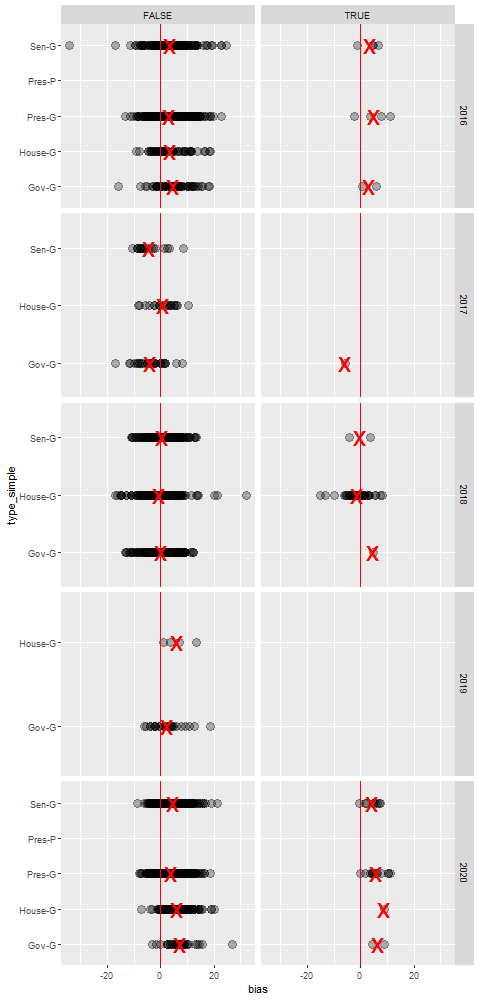

In [66]:
%%R -h 1000

#pollster_df <- df %>% filter(pollster=='Siena College/The New York Times Upshot')

plot_type_1 <- function(pollster_to_plot) {

pollster_df <- df %>% filter(pollster=='my_pollster')
ggplot(df %>% filter(year>=2016)) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom='point', shape='x', size=10, color='red', alpha=1) +
    geom_vline(aes(xintercept=0), color='red') +
    #facet_wrap(~pollster=='Siena College/The New York Times Upshot')
    facet_grid(year~pollster=='Siena College/The New York Times Upshot', scales='free_y')
}

plot_type_1('Siena College/The New York Times Upshot')

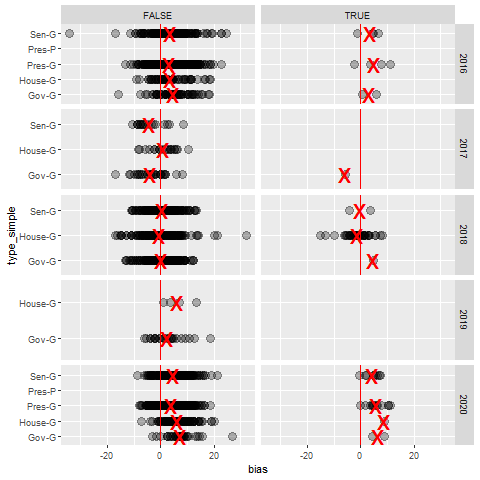

In [67]:
%%R

pollsters_I_want <- c('Siena College/The New York Times Upshot', 'Jayhawk Consulting Services', "Brown University", 'Fox News/Beacon Research/Shaw & Co. Research')
plot_type_1(pollsters_I_want)

In [68]:
test_col = df.bias.abs()

In [129]:
df['abs_bias'] = test_col

In [130]:
nyt = df[df.pollster == "Siena College/The New York Times Upshot"]

In [121]:
nyt.pivot_table(
    index='year', 
    values='bias', 
    aggfunc=['mean','median','std', 'count'])

,mean,median,std,count
,bias,bias,bias,bias
year,,,,
2016,4.130000,4.565,4.145295,10
2017,-5.920000,-5.920,NaN,1
2018,-1.207826,-1.530,4.629135,46
2020,5.474400,5.220,3.105451,25


In [148]:
nyt.abs_bias.mean()

4.3619512195121946

In [149]:
df.abs_bias.mean()

4.911728241160472

#### NYT/Siena College average absolute bias is 0.5 points higher than the average absolute bias for all the pollsters. There difference isn't big, so they're an average pollster.

In [75]:
nyt.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.101667
House-G    3.667273
Pres-G     5.933529
Pres-P          NaN
Sen-G      4.322667
Name: abs_bias, dtype: float64

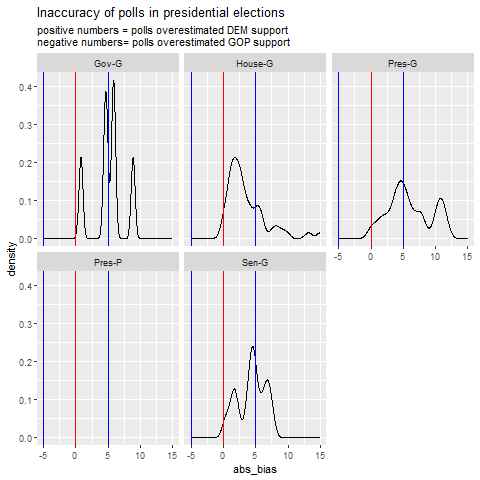

In [76]:
%%R -i nyt

# a basic histogram
ggplot(nyt) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [77]:
print("Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.")

Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.


👉 **Jayhawk Consulting**

In [ ]:
df['abs_bias'] = df.bias.abs()
df

In [132]:
jayhawk = df[df.pollster == "Jayhawk Consulting Services"]
jayhawk.abs_bias.mean()

37.614999999999995

In [134]:
df.abs_bias.mean()

4.911728241160472

#### Jayhawk Consulting has conducted only two polls. They are way off from mean for absolute bias. Not much of pollster

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [135]:
fox = df[df.pollster == "Fox News/Beacon Research/Shaw & Co. Research"]

In [136]:
len(fox)

46

In [138]:
fox.abs_bias.mean()

4.751290322580646

In [139]:
df.abs_bias.mean()

4.911728241160472

#### Fox News/Beacon Research/Shaw & Co. Research has conducted 46 polls. Their mean for absolute bias appears to slightly below the mean for the whole dataset. 

In [82]:
fox.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      6.965000
House-G    3.055000
Pres-G     3.669167
Pres-P          NaN
Sen-G      5.472222
Name: abs_bias, dtype: float64

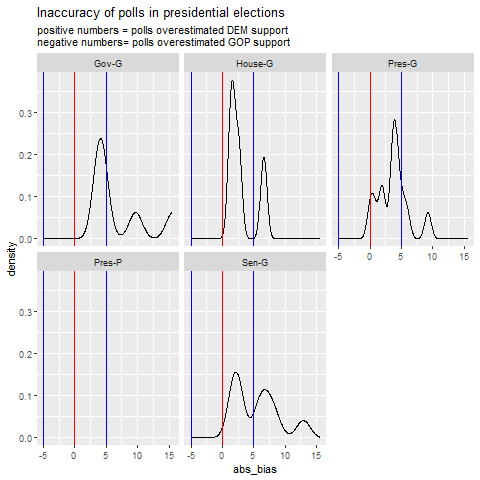

In [86]:
%%R -i fox

# a basic histogram
ggplot(fox) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

👉 **Brown University**

In [140]:
brown = df[df.pollster == "Brown University"]
len(brown)

12

In [141]:
brown.abs_bias.mean()

8.827142857142857

In [143]:
df.abs_bias.mean()

4.911728241160472

##### Brown University has conducted 12 polls. Their mean for absolute bias is double the general average. Not a particularly accurate pollster.

In [88]:
%%R

df <- read_csv('raw-polls.csv') 

Rows: 10776 Columns: 31
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [96]:
%%R

brown <- df %>% filter(pollster=='Brown University')
brown

# A tibble: 12 x 31
   poll_id questio~1 race_id  year race  locat~2 type_~3 type_~4 polls~5 polls~6
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1    7278      8927    7150  2000 2000~ RI      Pres-P  Pres-D  Brown ~      35
 2   64034    117851    7152  2000 2000~ VT      Pres-P  Pres-D  Brown ~      35
 3    6416      7883     845  2000 2000~ RI      Pres-G  Pres-G  Brown ~      35
 4    6416     27199    1707  2000 2000~ RI      Sen-G   Sen-G   Brown ~      35
 5   25424     88455    1409  2002 2002~ RI      Gov-G   Gov-G   Brown ~      35
 6   25424     30664    1675  2002 2002~ RI      Sen-G   Sen-G   Brown ~      35
 7   25424    117562    3067  2002 2002~ RI-1    House-G House-G Brown ~      35
 8    2383      2964    7404  2008 2008~ RI      Pres-P  Pres-D  Brown ~      35
 9   34002     41321    1239  2014 2014~ RI      Gov-G   Gov-G   Brown ~      35
10   34316     42010    1239  2014 2014~ RI      Gov-G   Gov-G   Brown ~      35
11   427

In [99]:
%%R

brown %>% colnames()

 [1] "poll_id"            "question_id"        "race_id"           
 [4] "year"               "race"               "location"          
 [7] "type_simple"        "type_detail"        "pollster"          
[10] "pollster_rating_id" "methodology"        "partisan"          
[13] "polldate"           "samplesize"         "cand1_name"        
[16] "cand1_id"           "cand1_party"        "cand1_pct"         
[19] "cand2_name"         "cand2_id"           "cand2_party"       
[22] "cand2_pct"          "cand3_pct"          "margin_poll"       
[25] "electiondate"       "cand1_actual"       "cand2_actual"      
[28] "margin_actual"      "bias"               "rightcall"         
[31] "comment"           


In [100]:
%%R

brown$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-11.080  -9.060  -5.570  -2.213   1.380  16.520       5 


In [111]:
%%R

brown$rightcall %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8333  1.0000  1.0000 


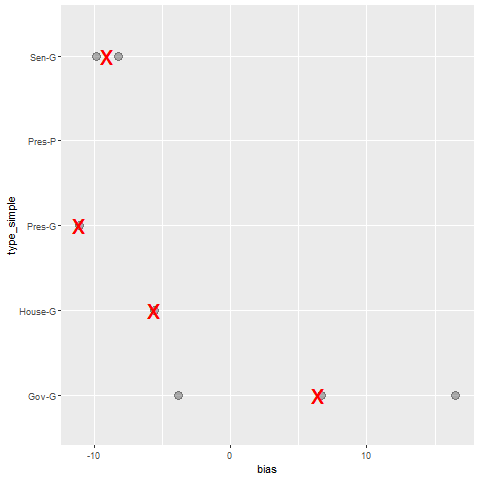

In [114]:
%%R

ggplot(brown) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='x',
                 size=10, color="red", alpha=1)
    #geom_vline(aes(xintercept=0), color="purple") +
    #facet_grid(year~pollster, scales='free_y')

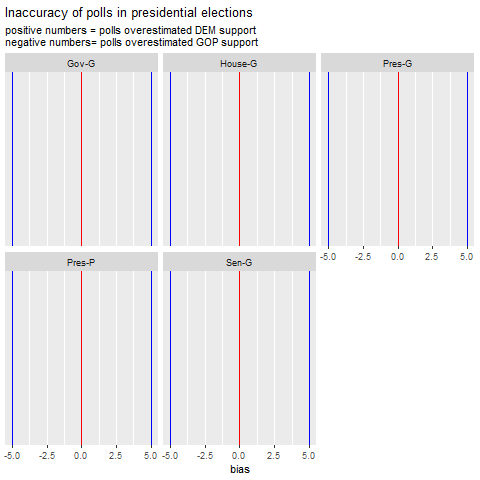

In [122]:
%%R

ggplot(brown) +
    aes(x=bias) +
    #geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [90]:
%%R

brown_G <- brown %>% filter(type_simple=='Gov-G')
brown_G

# A tibble: 3 x 31
  poll_id question~1 race_id  year race  locat~2 type_~3 type_~4 polls~5 polls~6
    <dbl>      <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
1   25424      88455    1409  2002 2002~ RI      Gov-G   Gov-G   Brown ~      35
2   34002      41321    1239  2014 2014~ RI      Gov-G   Gov-G   Brown ~      35
3   34316      42010    1239  2014 2014~ RI      Gov-G   Gov-G   Brown ~      35
# ... with 21 more variables: methodology <chr>, partisan <chr>,
#   polldate <chr>, samplesize <dbl>, cand1_name <chr>, cand1_id <dbl>,
#   cand1_party <chr>, cand1_pct <dbl>, cand2_name <chr>, cand2_id <dbl>,
#   cand2_party <chr>, cand2_pct <dbl>, cand3_pct <dbl>, margin_poll <dbl>,
#   electiondate <chr>, cand1_actual <dbl>, cand2_actual <dbl>,
#   margin_actual <dbl>, bias <dbl>, rightcall <dbl>, comment <chr>, and
#   abbreviated variable names 1: question_id, 2: location, 3: type_simple, ...
# i Use `colnames()` to see all variable names


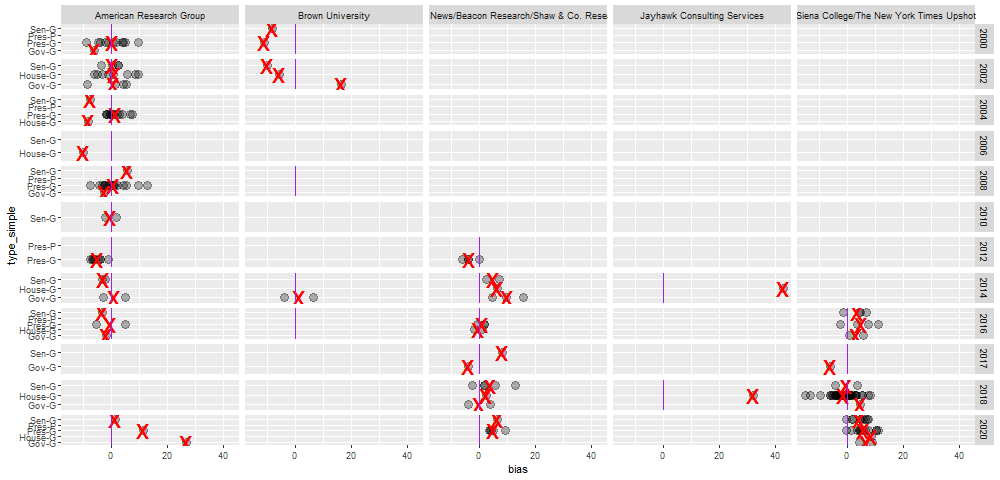

In [92]:
%%R -w 1000

pollsters_i_want <- c('Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services','Brown University', 
                      'Fox News/Beacon Research/Shaw & Co. Research', 'American Research Group')

pollster_df <- df %>% filter(pollster %in% pollsters_i_want)

ggplot(pollster_df) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='x',
                 size=10, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    facet_grid(year~pollster, scales='free_y')

👉 **American Research Group**

In [151]:
arg = df[df.pollster == "American Research Group"]
len(arg)

277

In [155]:
arg.abs_bias.mean()

4.245348837209303

In [156]:
df.abs_bias.mean()

4.911728241160472

#### American Research Group has conducted 277 polls. Their mean for absolute bias more than 0.5 percentage points below the average. Based on this analysis they're a fairly solid pollster.

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

In [ ]:
df['abs_bias'] = df.bias.abs()
df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment,abs_bias
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,11/3/98,33.16,54.32,-21.15,-9.85,1.0,for New York Daily News | WABC-TV (New York),9.85
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,10/13/98,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,11/3/98,44.69,50.05,-5.36,-9.64,1.0,NaN,9.64
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,Live Phone,D,10/13/98,488.0,Harry Reid,3964,DEM,49.0,John Ensign,3965,REP,44.0,NaN,5.0,11/3/98,47.86,47.77,0.09,4.91,1.0,for unspecified Democratic sponsor,4.91
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Charles E. Schumer,3966,DEM,44.0,Alfonse M. D'Amato,3967,REP,52.0,NaN,-8.0,11/3/98,54.62,44.08,10.54,-18.54,0.0,for New York Daily News | WABC-TV (New York),18.54
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,Live Phone,D,10/13/98,902.0,Charles E. Schumer,3966,DEM,46.0,Alfonse M. D'Amato,3967,REP,42.0,NaN,4.0,11/3/98,54.62,44.08,10.54,-6.54,1.0,for Charles E. Schumer,6.54


In [ ]:
df_rank = df.groupby('pollster').abs_bias.mean().reset_index()
df_rank


,pollster,abs_bias
0,1892 Polling,0.610000
1,20/20 Insight,3.498000
2,A&A Research,10.040000
3,ABC News/The Washington Post,2.977273
4,ALG Research,6.311000
...,...,...
488,Zimmerman & Associates/Marketing Intelligence,4.673333
489,Zogby Interactive/JZ Analytics,5.191921
490,brilliant corners Research & Strategies,12.270000
491,ccAdvertising,7.363939


In [ ]:
df_rank.sort_values(by='abs_bias', ascending=False)
df2=df_rank.dropna(subset=['abs_bias']).reset_index(drop=True)
df2.sort_values(by='abs_bias')
df_final=df2.sort_values(by='abs_bias').reset_index(drop=True)
df_final

,pollster,abs_bias
0,Winthrop University,0.180
1,Amber Integrated,0.380
2,1892 Polling,0.610
3,Ogden & Fry,0.650
4,Mercyhurst University,0.740
...,...,...
444,Bainbridge Media Group,21.180
445,Dane & Associates,21.300
446,Massie & Associates,23.980
447,Riggs Research Services,33.650


👉 Which are the least accurate?

#### The least accurate are Bainbridge Media Group, Jayhawk Consulting, Dane Associates, Massie Associates and Riggs Research Service.

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


### I used a simple yardstick: the average absolute bias. But skills with ggplot and R aren't strong enough at this stage so that I could have done more solid and nuanced analysis. For example, I didn't control the comparison for the number of polls.

👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


#### I distilled the measuring down to a single variable and included all the pollsters in my sample.

👉 In bullet point form, list the **limitations** of your approach 


#### It doesn't control for the number of polls the pollster has conducted, whether they conducted their polls in swing states, nationally etc. and I didn't remove outliers i.e. individual polls that were badly off and could have affected the overall average of a single pollster. So I have much to learn: I tried to find my way working back and forth between Python and R, tried to memorize some basic commands and tools.